In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

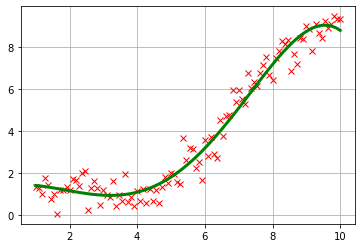

In [38]:
# fit a polynomial of order 6
one = np.ones(shape=data_y.shape)
X= np.concatenate((one,data_x),1)
X= np.concatenate((X,data_x**2,data_x**3,data_x**4,data_x**5,data_x),1)
coeffs=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,data_y))
plt.grid()
plt.plot(data_x,data_y,'rx')
xlim,ylim=(plt.gca().get_xlim(),plt.gca().get_ylim())
plt.plot(data_x, X @ coeffs,'g-',linewidth=3)

In [39]:
# Implement gradient computation and theta update 
def gradcom(x_sample,y_sample,LR,theta):
    grad = (1/m) * x_sample.T @ ((x_sample@ theta) - y_sample)
    theta -= LR * grad
    return theta


In [40]:
def gradient_descent_ls(X, y, iters, LR):
    m, n = X.shape
    theta = np.zeros(n).reshape(n,1)
    losses=[]
    
    for t in range(iters):
        yhat = X @ theta - y
        grad = (1/m) * X.T @ ((X@ theta) - y)
        theta -= LR * grad
        losses.append(lossf(theta,X,y))
    return theta,losses

In [41]:
theta1,losses=gradient_descent_ls(data_x1,data_y,8000,0.01)

In [42]:
def hypo(X, theta):
    return X @ theta
def lossf(theta, X, y):
    return np.mean(np.square(hypo(X, theta) - y))

In [43]:

m, n = data_x.shape
data_x1 = np.hstack((np.ones((m, 1)), data_x))
data_x1= np.hstack((
    data_x1,
    (data_x1[:, 1] ** 2).reshape((m, 1)),
    (data_x1[:, 1] ** 3).reshape((m, 1)),
    (data_x1[:, 1] ** 4).reshape((m, 1)),
    (data_x1[:, 1] ** 5).reshape((m, 1)),
    (data_x1[:, 1] ** 6).reshape((m, 1))
))
data_x1[:, 1:] = (data_x1[:, 1:] - np.mean(data_x1[:, 1:], axis=0)) / np.std(data_x1[:, 1:], axis=0)

In [44]:
# Call stochastic gradient descent in the main loop
m,n= data_x1.shape
LR=0.01
sample_size=30
epochs=1000
theta = np.zeros(n).reshape(n,1)
costs=[]
for i in range(epochs): 
    idx = np.random.choice(m, sample_size, replace=False)
    x_sample=data_x1[idx]
    y_sample=data_y[idx]
    yhat = x_sample @ theta - y_sample
    #grad = (1/m) * x_sample.T @ ((x_sample@ theta) - y_sample)
    #theta -= LR * grad
    theta=gradcom(x_sample,y_sample,LR,theta)
    costs.append(lossf(theta,x_sample,y_sample))
print(theta,costs)

[[3.64184865]
 [0.65129983]
 [0.69599369]
 [0.61826353]
 [0.48455801]
 [0.33576321]
 [0.1919597 ]] [21.42045336991195, 28.507041533717018, 23.089378584646337, 17.65498190213017, 17.587341811769114, 29.420809818576636, 22.60529568881795, 21.924750537821375, 22.030086063199466, 24.36871626305703, 21.88825077996264, 18.41973643179865, 21.694013978148437, 14.686087052960453, 15.623497512078242, 16.27445696374642, 19.730684149222313, 21.89091847960516, 19.824629528638074, 15.124867499397649, 21.870177538655717, 19.318249070136243, 22.373335160418844, 18.603888887356767, 19.66075608269299, 17.457361467004436, 16.902488903078833, 18.59032321594337, 18.950468585761048, 18.607747191977964, 13.913843752788171, 14.473547587486799, 10.035095354258045, 14.680801736027885, 14.864715398787949, 15.548020914024159, 14.49221168243283, 12.925226649037928, 14.141690571132175, 12.163291756489583, 14.102568052305083, 13.222699546196576, 14.349851441194497, 12.178489000648977, 16.273919363635454, 15.68213526

In [22]:
# predict y_hat using x and theta 
# plot x vs y in blue
# plot x vs y_hat in red

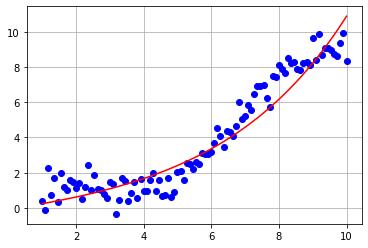

In [24]:
coef=theta
plt.grid()
plt.plot(data_x,data_y,'bo')
xlim,ylim=(plt.gca().get_xlim(),plt.gca().get_ylim())
plt.plot(data_x, data_x1@ coef,'r-')